In [2]:
import matplotlib.pyplot as plt
from metpy.units import units
from metpy.plots import USCOUNTIES
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
import pygrib
import numpy as np

In [30]:
grib_messages = pygrib.open('ds.conhazo.bin')
grib_messages.seek(0)

for message in grib_messages:
    print(message)
day2 = grib_messages[1].values

1:194:194 (avg):lambert:surface:level 0:fcst time 0-24 hrs (avg):from 202102171300
2:194:194 (avg):lambert:surface:level 0:fcst time 23-47 hrs (avg):from 202102171300
3:194:194 (avg):lambert:surface:level 0:fcst time 47-71 hrs (avg):from 202102171300


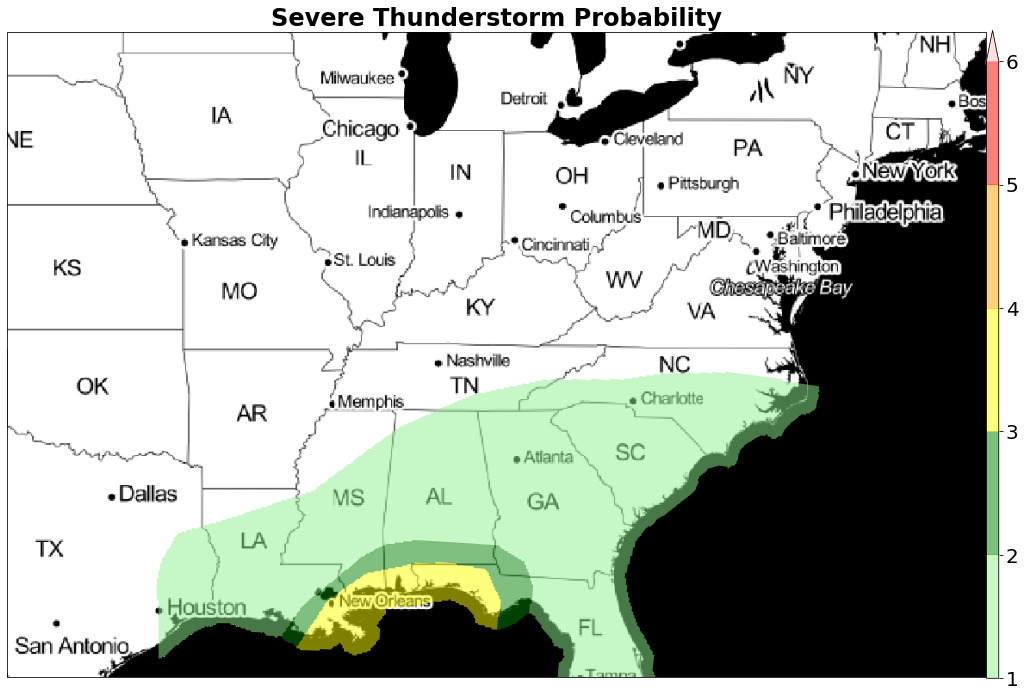

In [35]:
lats, lons = grib_messages[1].latlons()
data_crs = ccrs.Mercator()

image = Stamen(style='toner')

fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)
ax.add_image(image, 5)
ax.set_extent([-100, -70, 28, 43])

contour_fill = ax.contourf(lons, lats, day2, [1, 2, 3, 4, 5, 6], extend='max', 
                           colors=['lightgreen', 'green', 'yellow', 'orange', 'red', 'pink'],
                            alpha=0.5, transform=ccrs.PlateCarree())


for c in contour_fill.collections:
    c.set_edgecolor('face')
    c.set_linewidths(0.15)

cbar = plt.colorbar(contour_fill, orientation='vertical', pad=0, aspect=50)
cbar.ax.tick_params(labelsize=20)

plt.title('Severe Thunderstorm Probability', fontsize=24, fontweight='bold')
plt.savefig('snow.png', dpi=72)